## **Examen final - Nava Siñani Kelvin Jherman ** **texto en negrita**
# GITHUB https://github.com/Kel-340/InteligenciaArtificial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
from scipy import optimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

In [5]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df_train = pd.read_csv('/content/dataset_15.csv')

# Verificar las columnas del DataFrame original
print("Columnas del DataFrame original:")
print(df_train.columns)

# Seleccionar los primeros 10000 datos del DataFrame
X_train = df_train.head(10000)

# Verificar si hay valores nulos en el DataFrame
print("\nNúmero de valores nulos antes de reemplazar:")
print(X_train.isnull().sum().sum())

# Reemplazar los valores nulos por 0
X_train = X_train.fillna(0)

# Verificar el DataFrame resultante
print("\nPrimeras filas del DataFrame X_train después de reemplazar NaN por 0:")
print(X_train.head())

# Verificar si todavía hay valores nulos en el DataFrame
print("\nNúmero de valores nulos después de reemplazar:")
print(X_train.isnull().sum().sum())


Columnas del DataFrame original:
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '3062', '3063', '3064', '3065', '3066', '3067', '3068', '3069', '3070',
       '3071'],
      dtype='object', length=3072)

Número de valores nulos antes de reemplazar:
1996

Primeras filas del DataFrame X_train después de reemplazar NaN por 0:
     0    1    2    3    4    5    6    7    8    9  ...   3062   3063   3064  \
0  255  255  255  255  255  255  255  255  255  255  ...  255.0  255.0  255.0   
1  255  255  255  255  255  255  255  255  255  255  ...  255.0  255.0  255.0   
2  161  162   94  161  162   94  161  162   94  161  ...  255.0  255.0  255.0   
3  255  255  255  255  255  255  255  255  255  255  ...  255.0  255.0  255.0   
4  255  255  255  255  255  255  255  255  255  255  ...  255.0  255.0  255.0   

    3065   3066   3067   3068   3069   3070   3071  
0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  
1  255.0  255.0  255.0  255.0  255.0  255.0  255.0  
2

In [6]:
# Normalización de las imágenes, asumiendo que todas las columnas contienen datos de píxeles
X_train = X_train / 255.0

# Verificar la normalización
print(X_train.head())
X=X_train

          0         1         2         3         4         5         6  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.631373  0.635294  0.368627  0.631373  0.635294  0.368627  0.631373   
3  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

          7         8         9  ...  3062  3063  3064  3065  3066  3067  \
0  1.000000  1.000000  1.000000  ...   1.0   1.0   1.0   1.0   1.0   1.0   
1  1.000000  1.000000  1.000000  ...   1.0   1.0   1.0   1.0   1.0   1.0   
2  0.635294  0.368627  0.631373  ...   1.0   1.0   1.0   1.0   1.0   1.0   
3  1.000000  1.000000  1.000000  ...   1.0   1.0   1.0   1.0   1.0   1.0   
4  1.000000  1.000000  1.000000  ...   1.0   1.0   1.0   1.0   1.0   1.0   

   3068  3069  3070  3071  
0   1.0   1.0   1.0   1.0  
1   1.0   1.0   1.0   1.0  
2   1.0 

In [9]:
# Number of clusters for K-Means
k = 50
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_n=X_scaled
# Verificar las dimensiones de los datos
print(X.shape)
print(X_scaled.shape)

(8921, 3072)
(8921, 3072)


In [10]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=50, random_state=42)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Ajustar K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Calcular la puntuación de silueta
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

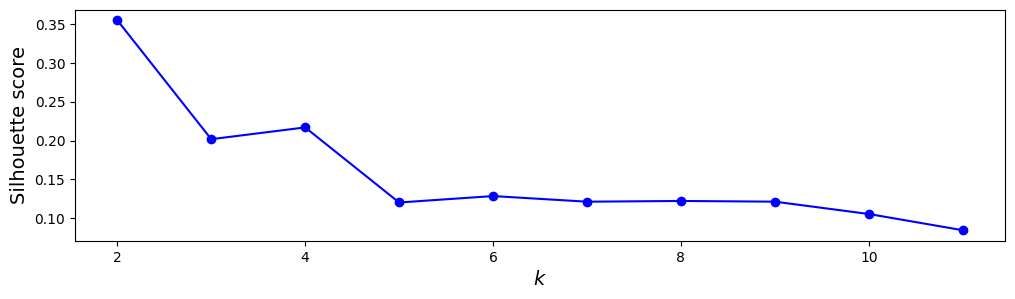

In [63]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 12)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(12, 3))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [2]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

NameError: name 'kmeans_per_k' is not defined

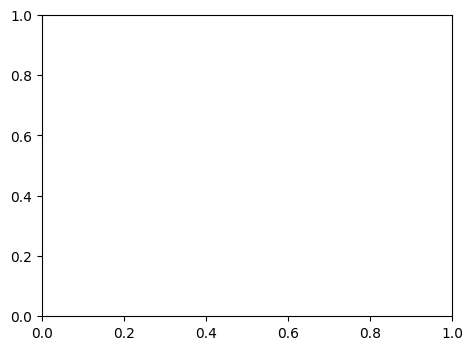

In [4]:
import matplotlib.pyplot as plt



plt.figure(figsize=(18, 18))

# Ajustar el número de filas y columnas para que se ajusten todos los subgráficos
n_rows = 4
n_cols = 3

for k in range(2, 12):
    plt.subplot(n_rows, n_cols, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 50
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), -1, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k % n_cols == 1:
        plt.ylabel("Cluster")

    if k > 8:
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()

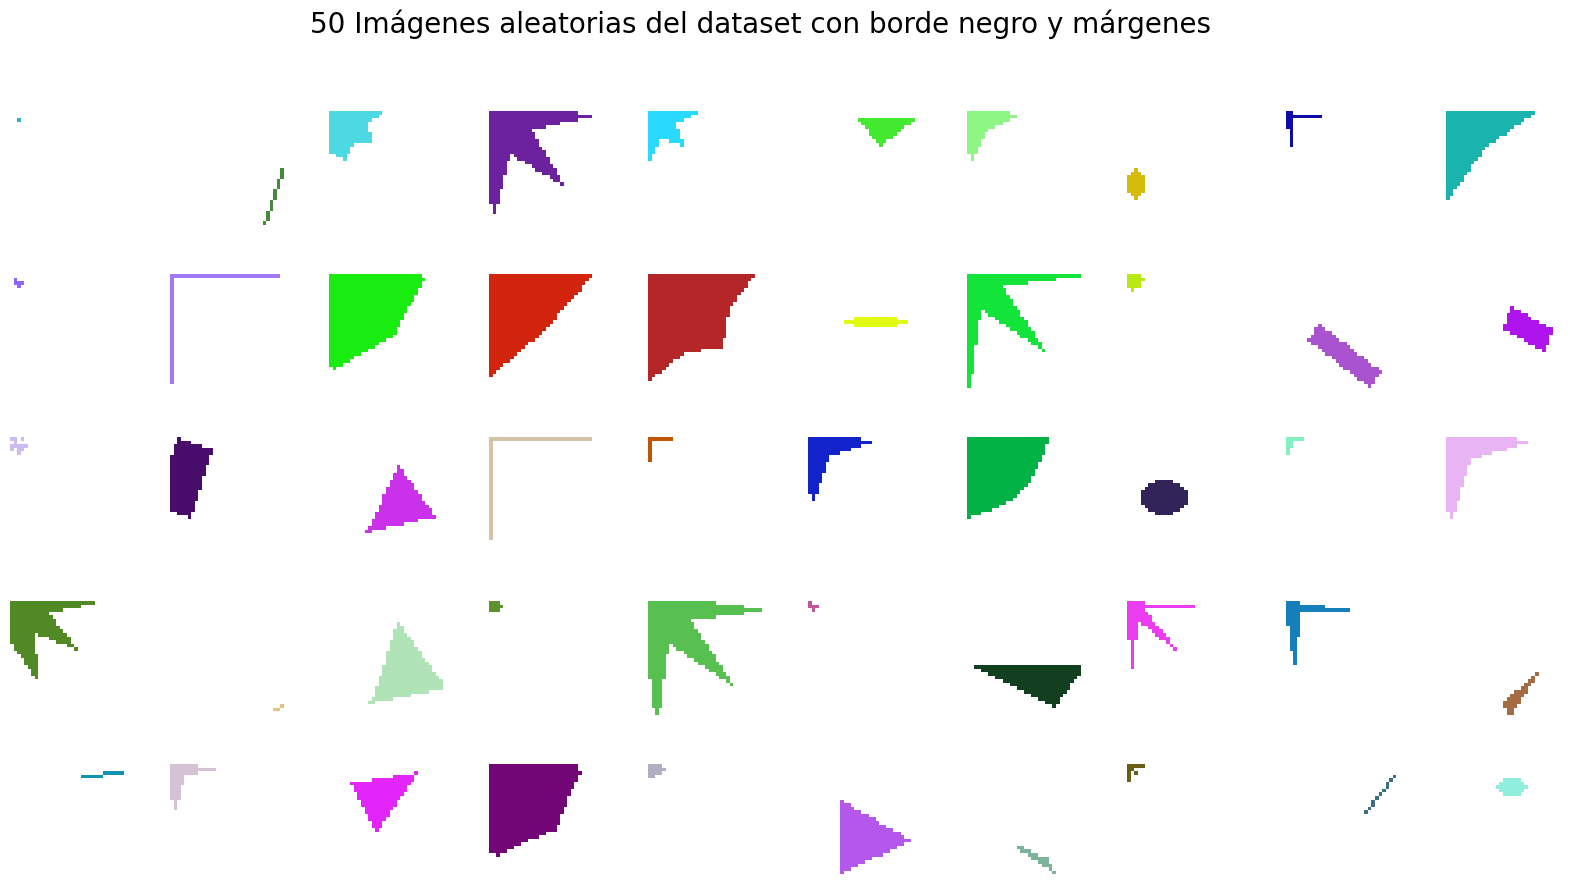

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado tu DataFrame df_train con los datos

# Seleccionar 50 índices aleatorios del DataFrame
indices_aleatorios = np.random.choice(df_train.index, size=50, replace=False)

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(5, 10, figsize=(20, 10))  # Crear una cuadrícula de 5x10 para las 50 imágenes

# Ajustar los espacios entre los subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Iterar sobre los índices aleatorios y las posiciones en la cuadrícula
for idx, ax in zip(indices_aleatorios, axes.ravel()):
    # Obtener el dato del DataFrame y convertirlo a una matriz 3D
    imagen = np.array(df_train.iloc[idx]).reshape(32, 32, 3) / 255.0  # Normalizar dividiendo por 255.0

    # Mostrar la imagen en el subplot correspondiente con borde negro
    ax.imshow(imagen)
    ax.set_axis_off()  # Ocultar los ejes
    ax.set_xticks([])  # Ocultar los ticks del eje x
    ax.set_yticks([])  # Ocultar los ticks del eje y
    for spine in ax.spines.values():  # Añadir borde negro
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    # Ajustar márgenes para separar cada imagen dentro de su celda
    ax.margins(x=0.2, y=0.2)

# Título general para toda la figura
plt.suptitle('50 Imágenes aleatorias del dataset', fontsize=20)

# Mostrar la figura
plt.show()
